In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [2]:
df = pd.read_csv ("purchases.txt",sep="\t", header = None)

In [3]:
df.head()

,0,1,2
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [4]:
df.columns = ["customer_id","tran_amount","trans_date"]

In [5]:
df.head()

,customer_id,tran_amount,trans_date
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  51243 non-null  int64  
 1   tran_amount  51243 non-null  float64
 2   trans_date   51243 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [7]:
print(df['trans_date'].min(), df['trans_date'].max())

2005-01-02 2015-12-31


In [8]:
df['trans_date']= pd.to_datetime(df['trans_date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  51243 non-null  int64         
 1   tran_amount  51243 non-null  float64       
 2   trans_date   51243 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 MB


In [10]:
sd = dt.datetime(2016,1,1)
df['hist']= sd - df['trans_date']
df['hist'].astype('timedelta64[D]')
df['hist']=df['hist'] / np.timedelta64(1, 'D')
df.head()

,customer_id,tran_amount,trans_date,hist
0,760,25.0,2009-11-06,2247.0
1,860,50.0,2012-09-28,1190.0
2,1200,100.0,2005-10-25,3720.0
3,1420,50.0,2009-07-09,2367.0
4,1940,70.0,2013-01-25,1071.0


In [11]:
rfmTable = df.groupby('customer_id').agg({'hist': lambda x:x.min(), # Recency
                                        'customer_id': lambda x: len(x),               # Frequency
                                        'tran_amount': lambda x: x.sum()})          # Monetary Value

rfmTable.rename(columns={'hist': 'recency', 
                         'customer_id': 'frequency', 
                         'tran_amount': 'monetary_value'}, inplace=True)

In [12]:
rfmTable.head(20)

,recency,frequency,monetary_value
customer_id,,,
10,3829.0,1,30.0
80,343.0,7,500.0
90,758.0,10,1158.0
120,1401.0,1,20.0
130,2970.0,2,100.0
160,2963.0,2,60.0
190,2211.0,5,340.0
220,2058.0,2,50.0
230,3985.0,1,50.0


In [13]:
rfmTable['recency'].unique()

array([3829.,  343.,  758., ...,   51.,   47.,   33.])

In [14]:
rfmTable['recency'].nunique()

1668

In [15]:
rfmTable['frequency'].unique()

array([ 1,  7, 10,  2,  5,  4,  9, 12,  3,  6,  8, 11, 34, 20, 21, 14, 13,
       17, 15, 22, 25, 18, 28, 27, 19, 23, 16, 45, 26, 37, 41, 29, 38, 24],
      dtype=int64)

In [16]:
rfmTable['frequency'].nunique()

34

In [17]:
rfmTable['monetary_value'].nunique()

587

In [18]:
rfmTable.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
recency,18417.0,1253.037900,1081.437868,1.0,244.0,1070.0,2130.0,4014.0
frequency,18417.0,2.782375,2.936888,1.0,1.0,2.0,3.0,45.0
monetary_value,18417.0,173.445453,540.339224,5.0,30.0,60.0,150.0,24350.0


In [19]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

C:\Users\Suvajyoti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Suvajyoti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Suvajyoti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

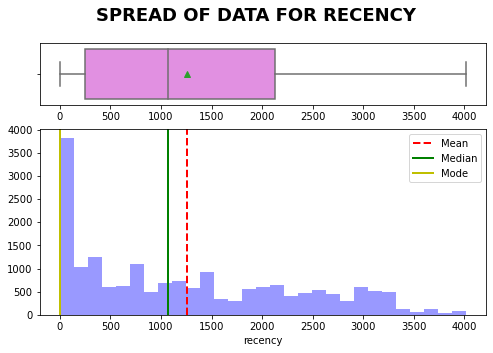

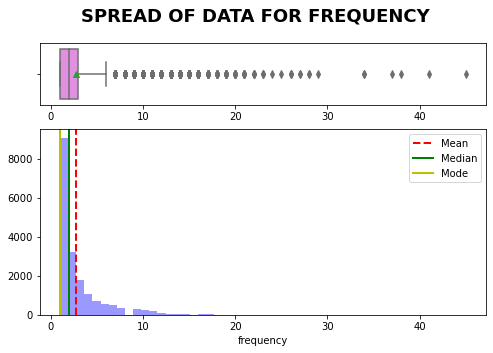

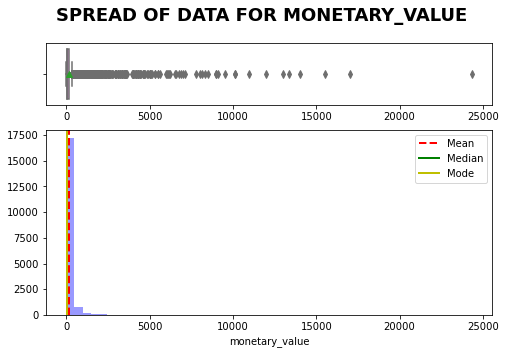

In [20]:
#select all quantitative columns for checking the spread
list_col=  rfmTable.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(rfmTable[list_col[i]])

In [21]:
df1=rfmTable.copy()

# Using Below mentioned Logic we are calculating R score, F score and M score

In [22]:
# For Recency
def rscore(x):
    if x <= 365:
        return 3
    elif x > 365 and x<= 730:
        return 2
    else:
        return 1
# For Frequency
def fscore(x):
    if x == 1:
        return 1
    elif x > 1 and x<=3:
        return 2
    else:
        return 3
# For Monetaryy value
def mscore(x):
    if x > 60:
        return 3
    elif x > 40 and x<=60:
        return 2
    else:
        return 1

In [23]:
df1['r_score'] = df1['recency'].apply(rscore)
df1['f_score'] = df1['frequency'].apply(fscore)
df1['m_score'] = df1['monetary_value'].apply(mscore)

In [24]:
df1.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
10,3829.0,1,30.0,1,1,1
80,343.0,7,500.0,3,3,3
90,758.0,10,1158.0,1,3,3
120,1401.0,1,20.0,1,1,1
130,2970.0,2,100.0,1,2,3


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18417 entries, 10 to 264200
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency         18417 non-null  float64
 1   frequency       18417 non-null  int64  
 2   monetary_value  18417 non-null  float64
 3   r_score         18417 non-null  int64  
 4   f_score         18417 non-null  int64  
 5   m_score         18417 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1007.2 KB


In [26]:
df2=df1.copy()

In [27]:
df2.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
10,3829.0,1,30.0,1,1,1
80,343.0,7,500.0,3,3,3
90,758.0,10,1158.0,1,3,3
120,1401.0,1,20.0,1,1,1
130,2970.0,2,100.0,1,2,3


# Using Below mentioned Logic we are calculating RFM_score from R score, F score and M score

In [28]:
df2["RFM_Score"] = df2['r_score'] * 100 + df2['f_score']* 10 + df2['m_score']

In [29]:
df2.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,RFM_Score
customer_id,,,,,,,
10,3829.0,1,30.0,1,1,1,111
80,343.0,7,500.0,3,3,3,333
90,758.0,10,1158.0,1,3,3,133
120,1401.0,1,20.0,1,1,1,111
130,2970.0,2,100.0,1,2,3,123


In [30]:
df2.describe()

,recency,frequency,monetary_value,r_score,f_score,m_score,RFM_Score
count,18417.000000,18417.000000,18417.000000,18417.000000,18417.000000,18417.000000,18417.000000
mean,1253.037900,2.782375,173.445453,1.692512,1.743715,2.066460,188.754846
std,1081.437868,2.936888,540.339224,0.893969,0.812797,0.911144,93.154137
min,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,111.000000
25%,244.000000,1.000000,30.000000,1.000000,1.000000,1.000000,111.000000
50%,1070.000000,2.000000,60.000000,1.000000,2.000000,2.000000,123.000000
75%,2130.000000,3.000000,150.000000,3.000000,2.000000,3.000000,311.000000
max,4014.000000,45.000000,24350.000000,3.000000,3.000000,3.000000,333.000000


# Total No. of Segements based on RFM Score

Based on RFM score we got 27 segments for this customer transaction dataset.

Level of r_score =1,2,3

Level of f_score =1,2,3

Level of m_score =1,2,3


3x3x3 = 27 (Total number of Segment Combinations)

In [31]:
df2['RFM_Score'].nunique()

27

In [32]:
df2['r_score'].nunique()

3

In [33]:
df2.shape

(18417, 7)

In [34]:
df2['RFM_Score'].unique()

array([111, 333, 133, 123, 122, 112, 233, 121, 113, 312, 222, 311, 223,
       323, 132, 322, 321, 211, 212, 131, 213, 332, 221, 232, 313, 231,
       331], dtype=int64)

In [35]:
print("No of Best Customers:",len(df2[df2['RFM_Score']== 333]))

No of Best Customers: 2530


In [36]:
df2['RFM_Score'].value_counts(ascending=False)

111    4857
333    2530
123    1668
133    1207
112    1182
323     990
311     846
122     809
121     647
113     644
211     539
233     496
223     364
312     344
322     284
313     274
212     238
213     124
222     116
321      93
221      70
132      36
332      28
131      11
232      10
331       9
231       1
Name: RFM_Score, dtype: int64

In [37]:
df2['RFM_Score'].value_counts(ascending=False)/18417*100

111    26.372373
333    13.737308
123     9.056850
133     6.553728
112     6.417983
323     5.375468
311     4.593582
122     4.392681
121     3.513059
113     3.496769
211     2.926644
233     2.693164
223     1.976435
312     1.867839
322     1.542054
313     1.487756
212     1.292284
213     0.673291
222     0.629853
321     0.504968
221     0.380084
132     0.195472
332     0.152033
131     0.059727
232     0.054298
331     0.048868
231     0.005430
Name: RFM_Score, dtype: float64

In [38]:
df2.groupby('RFM_Score').agg('monetary_value').mean()

RFM_Score
111     23.831921
112     52.620051
113    217.206118
121     31.956136
122     54.381508
123    168.820120
131     35.727273
132     55.236111
133    344.851574
211     23.863636
212     51.752101
213    284.888871
221     32.786429
222     56.767241
223    252.557637
231     40.000000
232     54.300000
233    466.451956
311     25.063830
312     52.593023
313    272.380328
321     34.040000
322     56.781690
323    223.056061
331     36.444444
332     52.928571
333    538.545731
Name: monetary_value, dtype: float64

In [39]:
df3=df2.copy()

In [40]:
df3.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,RFM_Score
customer_id,,,,,,,
10,3829.0,1,30.0,1,1,1,111
80,343.0,7,500.0,3,3,3,333
90,758.0,10,1158.0,1,3,3,133
120,1401.0,1,20.0,1,1,1,111
130,2970.0,2,100.0,1,2,3,123


In [41]:
def truncate(x):
    return math.trunc(x)

In [42]:
df3['fm'] = ((df3['f_score'] + df3['m_score'])/2).apply(lambda x: truncate(x))

In [43]:
df3.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,RFM_Score,fm
customer_id,,,,,,,,
10,3829.0,1,30.0,1,1,1,111,1
80,343.0,7,500.0,3,3,3,333,3
90,758.0,10,1158.0,1,3,3,133,3
120,1401.0,1,20.0,1,1,1,111,1
130,2970.0,2,100.0,1,2,3,123,2


In [44]:
df3['fm'].unique()

array([1, 3, 2], dtype=int64)

In [45]:
def www(df3):
    if df3['RFM_Score'] == 333 : 
        d = 'Core'
    elif df3['RFM_Score'] == 111:
        d = 'Totally Inactive'
    elif df3['f_score'] == 3 : 
        d = 'Loyal'
    elif df3['m_score'] == 3 : 
        d = 'Whales'
    elif df3['f_score'] == 3 and  df3['m_score'] == 1: 
        d = 'Promising'
    elif df3['f_score'] == 3 and  df3['m_score'] == 2: 
        d = 'Promising'
    elif df3['r_score'] == 3 and df3['f_score'] == 1: 
        d = 'Rookies'
    elif df3['r_score'] == 1 and df3['f_score'] == 1 : 
        d = 'Slipping'
    else:
        d = 'Unclassed'
    return d

df3['sales_label'] = df3.apply(www, axis=1)
df3

,recency,frequency,monetary_value,r_score,f_score,m_score,RFM_Score,fm,sales_label
customer_id,,,,,,,,,
10,3829.0,1,30.0,1,1,1,111,1,Totally Inactive
80,343.0,7,500.0,3,3,3,333,3,Core
90,758.0,10,1158.0,1,3,3,133,3,Loyal
120,1401.0,1,20.0,1,1,1,111,1,Totally Inactive
130,2970.0,2,100.0,1,2,3,123,2,Whales
...,...,...,...,...,...,...,...,...,...
263820,1.0,1,10.0,3,1,1,311,1,Rookies
263870,135.0,1,50.0,3,1,2,312,1,Rookies
263880,34.0,1,20.0,3,1,1,311,1,Rookies


In [46]:
df4=df2.copy()

In [47]:
df4.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,RFM_Score
customer_id,,,,,,,
10,3829.0,1,30.0,1,1,1,111
80,343.0,7,500.0,3,3,3,333
90,758.0,10,1158.0,1,3,3,133
120,1401.0,1,20.0,1,1,1,111
130,2970.0,2,100.0,1,2,3,123


# Following below mentioned logic we have tried to convert 27 segments into 8 managerial segments

In [67]:
def www(df4):
    if df4['RFM_Score'] == 333 : 
        d ='Most Important'
    elif df4['RFM_Score'] == 111:
        d ='Inactive'
    elif df4['r_score'] == 1:
        if df4['f_score'] == 1 and df4['m_score'] == 3:
            d ='Cold'
        elif df4['f_score'] == 2 and df4['m_score'] == 3:
            d ='Cold'
        elif df4['f_score'] == 3 and df4['m_score'] == 3:
            d ='Cold'
        else:
            d='Inactive'
        
    elif df4['r_score'] == 2:
        if df4['f_score'] == 1 and df4['m_score'] == 1:
            d ='Warm New'
        elif df4['f_score'] == 2 and df4['m_score'] == 1:
            d ='Warm New'
        elif df4['f_score'] == 3 and df4['m_score'] == 1:
            d ='Warm New'
        elif df4['f_score'] == 3 and df4['m_score'] == 3:
            d ='Warm High'
        elif df4['f_score'] == 2 and df4['m_score'] == 3:
            d ='Warm High'
        elif df4['f_score'] == 1 and df4['m_score'] == 3:
            d ='Warm High'
        elif df4['f_score'] == 1 and df4['m_score'] == 2:
            d ='Warm Low'
        elif df4['f_score'] == 2 and df4['m_score'] == 2:
            d ='Warm Low'
        elif df4['f_score'] == 3 and df4['m_score'] == 2:
            d ='Warm Low'
        else:
            d = 'Warm'
    elif df4['r_score'] == 3:
        if df4['f_score'] == 3 and df4['m_score'] == 1:
            d= 'Active Low'
        elif df4['f_score'] == 3 and df4['m_score'] == 2:
            d='Active Low'
        elif df4['f_score'] == 1 and df4['m_score'] == 3:
            d='Active High'
        elif df4['f_score'] == 1 and df4['m_score'] == 2: 
            d='Active Low'
        elif df4['f_score'] == 2 and df4['m_score'] == 2:
            d='Active Low'
        elif df4['f_score'] == 1 and df4['m_score'] == 1:
            d='Active Low'
        elif df4['f_score'] == 2 and df4['m_score'] == 1:
            d='Active Low'
        elif df4['f_score'] == 2 and df4['m_score'] == 3:
            d='Active High'
        else :
            d='Active'
    return d

df4['sales_label'] = df4.apply(www, axis=1)
df4

,recency,frequency,monetary_value,r_score,f_score,m_score,RFM_Score,sales_label
customer_id,,,,,,,,
10,3829.0,1,30.0,1,1,1,111,Inactive
80,343.0,7,500.0,3,3,3,333,Most Important
90,758.0,10,1158.0,1,3,3,133,Cold
120,1401.0,1,20.0,1,1,1,111,Inactive
130,2970.0,2,100.0,1,2,3,123,Cold
...,...,...,...,...,...,...,...,...
263820,1.0,1,10.0,3,1,1,311,Active Low
263870,135.0,1,50.0,3,1,2,312,Active Low
263880,34.0,1,20.0,3,1,1,311,Active Low


In [73]:
segment_count=df4['sales_label'].value_counts() ##Count

In [78]:
segment_percentage=df4['sales_label'].value_counts()/18417*100 ##Percentage

In [71]:
segment_amv=df4.groupby('sales_label').agg('monetary_value').mean() ##Average monetary value

In [72]:
segment_amv

sales_label
Active High       233.748188
Active Low         37.654439
Cold              238.053012
Inactive           32.484792
Most Important    538.545731
Warm High         364.448547
Warm Low           53.420330
Warm New           24.914016
Name: monetary_value, dtype: float64

In [79]:
df5=pd.DataFrame({'segment_count': segment_count ,'segment_amv': segment_amv,'segment_percentage':segment_percentage})

In [80]:
df5

,segment_count,segment_amv,segment_percentage
Active High,1264,233.748188,6.863224
Active Low,1604,37.654439,8.709345
Cold,3519,238.053012,19.107346
Inactive,7542,32.484792,40.951295
Most Important,2530,538.545731,13.737308
Warm High,984,364.448547,5.342890
Warm Low,364,53.420330,1.976435
Warm New,610,24.914016,3.312157


In [81]:
df5['sales_amount']=df5['segment_count']*df5['segment_amv']

# Managerial Segments based on RFM Score

segment_count = Count of each segment

segment_amv = Average monetary Value of each segment

segment_percentage = Percentage of each segment

sales_amount = Total Sales Amount of each segment

In [82]:
df5

,segment_count,segment_amv,segment_percentage,sales_amount
Active High,1264,233.748188,6.863224,295457.71
Active Low,1604,37.654439,8.709345,60397.72
Cold,3519,238.053012,19.107346,837708.55
Inactive,7542,32.484792,40.951295,245000.30
Most Important,2530,538.545731,13.737308,1362520.70
Warm High,984,364.448547,5.342890,358617.37
Warm Low,364,53.420330,1.976435,19445.00
Warm New,610,24.914016,3.312157,15197.55
